In [3]:
import os
import geopandas as gp
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import matplotlib.gridspec as gridspec
from mpl_toolkits.basemap import Basemap
from pylab import *
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [4]:
plt.rcParams['axes.unicode_minus']=False#负号
plt.rcParams['font.sans-serif']=['Arial']###############
plt.rcParams['font.size'] = '7' # 设置字体大小 = '16' # 设置字体大小
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内

In [5]:
# latlon_1degree_SJ_last=path+'/global_grid.shp'
version='v16_250104'
output_dir = os.path.join(r'J:\lakemapping\postprocess',version)
excel_dir=os.path.join(output_dir,f'stastics_excel')

gdb=os.path.join(output_dir,f'7_correct_temp_file.gdb')
fig_path=r'D:\lakemapping\10_paper_writting\figure\v3_250114'
os.makedirs(fig_path,exist_ok=True)
# latlon_1degree_SJ_last_data = gp.read_file(gdb,layer='Global_grid_shp_1degree_hu_Count_Area')

global_diss=r'D:\lakemapping\0_auxiliary_data\World_Continents\world_vector\World_continents_dissolve.shp'
Arid_Region=r'D:\lakemapping\0_auxiliary_data\AI\Global-AI_ET0_annual_v3\Global-AI_ET0_v3_annual\Global_AI_Reclassify_Clip_simple.shp'

color_list=['#B8DBB3','#72B063','#E29135','#94C6CD','#719AAC','#4A5F7E']#浅绿，深绿，橙色，浅蓝，中蓝，深蓝
red_color_list=['#311d3f','#522546','#88304e']
label_list=['0.005~0.01 ${km^2}$','0.01~0.03 ${km^2}$','0.03~0.1 ${km^2}$','0.1~1 ${km^2}$','>1 ${km^2}$']
sub_fig_name=['a','b','c','d','e','f']

# lake_category_bins=[0.005,0.01,1,100,10000,1000000]
# lake_category_labels=['Tiny','Small','Medium','Large','Super large']

lake_category_bins=[0.005,0.01,1,100,10000,1000000]
lake_category_labels=['1','3','10','100']

In [6]:
latlon_1degree_SJ_last_data=gp.read_file(gdb,layer='Global_grid_shp_1degree_hu_Count_Area')
latlon_1degree_SJ_last_data

,Join_Count,TARGET_FID,grid_area,hu_c0,hu_c1,hu_c3,hu_c10,hu_c100,Lat_down,Lon_left,...,diff_c0,diff_c_gt1,diff_c3,diff_c10,diff_c100,diff_a0,diff_a3,diff_a10,diff_a100,geometry
0,0,1,6857.436497,0,0,0,0,0,-57,-69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-69.00000 -57.00000, -69.00000..."
1,1,2,7035.675627,1,1,0,0,0,-56,-72,...,1.0,0.0,0.0,0.0,0.0,0.008277,0.000000,0.000000,0.000000,"MULTIPOLYGON (((-72.00000 -56.00000, -72.00000..."
2,186,3,7035.675627,184,33,60,55,34,-56,-71,...,170.0,137.0,56.0,53.0,27.0,12.307538,1.039664,2.839164,6.704510,"MULTIPOLYGON (((-71.00000 -56.00000, -71.00000..."
3,436,4,7035.675627,432,98,124,108,95,-56,-70,...,366.0,268.0,120.0,92.0,52.0,50.037233,2.068706,5.377594,13.719308,"MULTIPOLYGON (((-70.00000 -56.00000, -70.00000..."
4,533,5,7035.675627,529,137,188,144,58,-56,-69,...,321.0,184.0,132.0,44.0,9.0,5.547762,2.239651,2.430952,1.974050,"MULTIPOLYGON (((-69.00000 -56.00000, -69.00000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18045,62,18046,2698.461110,62,21,27,8,5,77,104,...,62.0,41.0,27.0,8.0,5.0,4.210387,0.429799,0.431722,1.202110,"MULTIPOLYGON (((104.00000 77.00000, 104.00000 ..."
18046,47,18047,2698.461110,45,19,13,7,4,77,105,...,41.0,22.0,12.0,6.0,3.0,7.155236,0.200577,0.303044,0.645353,"MULTIPOLYGON (((105.00000 77.00000, 105.00000 ..."
18047,13,18048,2698.461110,13,4,5,3,1,77,106,...,6.0,2.0,-2.0,3.0,1.0,0.401006,-0.027417,0.130375,0.265666,"MULTIPOLYGON (((106.00000 77.00000, 106.00000 ..."
18048,3,18049,2698.461110,3,1,1,1,0,77,107,...,2.0,1.0,1.0,0.0,0.0,0.048315,0.020615,0.021268,0.000000,"MULTIPOLYGON (((107.00000 77.00000, 107.00000 ..."


In [47]:
Lat_data = latlon_1degree_SJ_last_data.drop(columns='geometry').groupby(['Lat_down']).sum().reset_index()
latitude= Lat_data['Lat_down'].values
Lat_data

,Lat_down,Join_Count,TARGET_FID,grid_area,hu_c0,hu_c1,hu_c3,hu_c10,hu_c100,Lon_left,...,hu_ap_small_lake,diff_c0,diff_c_gt1,diff_c3,diff_c10,diff_c100,diff_a0,diff_a3,diff_a10,diff_a100
0,-57,0,1,6857.436497,0,0,0,0,0,-69,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,-56,1735,44,56285.405019,1718,403,543,472,281,-294,...,394.748336,930.0,527.0,277.0,172.0,74.0,67.171115,4.959826,9.629766,20.703206
2,-55,4508,333,129810.117465,4466,1260,1403,1046,687,-783,...,1016.938581,3343.0,2083.0,905.0,712.0,429.0,235.028388,15.927083,39.926521,107.026721
3,-54,4032,325,73853.770185,3996,1019,1238,950,685,-649,...,412.164301,2642.0,1623.0,802.0,545.0,266.0,-1563.896859,14.035021,30.241569,51.591873
4,-53,4034,623,105794.302551,4009,1109,1321,896,605,-485,...,975.839656,2507.0,1398.0,813.0,431.0,149.0,-2096.931058,13.864983,22.765979,35.964117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,73,85557,2329362,470733.379050,84688,24568,26713,17163,11503,1763,...,3732.817994,36464.0,11896.0,6028.0,1585.0,705.0,1673.288001,-202.612841,-579.071227,-2363.485761
131,74,20054,2063763,389690.967955,19750,4630,5187,3769,2820,651,...,3525.020231,9861.0,5231.0,1346.0,496.0,332.0,717.998134,-28.221852,-123.110808,-555.624665
132,75,17087,2291298,402602.122655,16866,4339,4694,2929,1826,579,...,4500.242317,9571.0,5232.0,1525.0,656.0,204.0,654.712713,-6.941089,-42.661904,-276.790576
133,76,12821,2289984,372503.081772,12680,2624,2773,1468,645,-1591,...,4847.648184,9075.0,6451.0,911.0,397.0,57.0,579.090750,1.435510,-6.717192,-74.979965


In [48]:
Lon_data = latlon_1degree_SJ_last_data.drop(columns='geometry').groupby(['Lon_left']).sum().reset_index()
longitude= Lon_data['Lon_left'].values
Lon_data

,Lon_left,Join_Count,TARGET_FID,grid_area,hu_c0,hu_c1,hu_c3,hu_c10,hu_c100,Lat_down,...,hu_ap_small_lake,diff_c0,diff_c_gt1,diff_c3,diff_c10,diff_c100,diff_a0,diff_a3,diff_a10,diff_a100
0,-180,3042,119311,94040.668499,3029,849,1022,723,412,368,...,200.000000,1122.0,273.0,177.0,43.0,48.0,1.781249,-15.113106,-36.387241,-89.502489
1,-179,4971,131345,149142.636343,4930,1201,1735,1159,784,291,...,260.519801,1589.0,388.0,217.0,108.0,57.0,52.054786,-26.899280,-55.435940,-191.189640
2,-178,4922,100821,52731.232543,4875,1266,1770,1219,578,386,...,200.000000,1703.0,437.0,300.0,109.0,22.0,73.804704,-23.998123,-55.478091,-134.453428
3,-177,4942,95757,88239.667358,4914,1154,1736,1314,676,243,...,387.888619,1518.0,364.0,235.0,60.0,66.0,69.602328,-23.721969,-60.134762,-134.189588
4,-176,3393,118219,114769.541901,3369,929,1215,829,372,295,...,308.279275,1187.0,258.0,117.0,83.0,55.0,-199.820662,-19.557552,-38.983146,-79.137325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,175,11080,163937,146303.083010,11010,3095,3882,2539,1385,359,...,300.433045,4567.0,1472.0,1035.0,280.0,142.0,154.805965,-47.835880,-116.687585,-295.824917
356,176,11957,147960,171009.355562,11842,3261,4178,2766,1517,238,...,618.901908,4731.0,1470.0,1053.0,225.0,168.0,-776.451136,-53.970346,-133.555748,-338.555763
357,177,12313,169639,168137.945499,12233,3455,4308,2818,1522,408,...,476.356487,5127.0,1672.0,1162.0,354.0,134.0,-284.879230,-54.792632,-128.965842,-361.862129
358,178,8411,201313,172226.131717,8361,2504,3106,1857,820,510,...,501.656294,3535.0,1031.0,715.0,223.0,81.0,-11.004605,-41.669538,-84.152197,-188.028579


In [40]:
GLAKES_SJ_last_data=gp.read_file(gdb,layer='Global_grid_shp_1degree_GLAKES_Count_Area')
G_Lat_data = GLAKES_SJ_last_data.drop(columns='geometry').groupby(['Lat_down']).sum().reset_index()
G_Lon_data = GLAKES_SJ_last_data.drop(columns='geometry').groupby(['Lon_left']).sum().reset_index()
G_Lat_data

,Lat_down,Join_Count,TARGET_FID,grid_area,GL_c0,GL_c10,GL_c100,Lon_left,Grid_ID,GL_a0,GL_a10,GL_a100,GL_ap,Shape_Length,Shape_Area
0,-57,0,1,6857.436497,0,0,0,-69,1,0.000000,0.000000,0.000000,0,4.0,1.0
1,-56,316,44,56285.405019,316,187,119,-294,44,112.099805,9.901482,29.643026,05.91512152032146E-020.1663290281083692.623970...,32.0,8.0
2,-55,824,333,129810.117465,809,428,343,-783,333,1037.359588,23.600723,99.009015,1.55162988524693E-020.1408630807790920.5427666...,72.0,18.0
3,-54,1010,325,73853.770185,995,491,430,-649,325,488.879336,27.377035,123.101988,0.0350886548561560.3820839122725551.1137977422...,40.0,10.0
4,-53,800,623,105794.302551,790,453,290,-485,623,499.630754,24.807135,88.030706,00.2482508369446131.195055144969472.1994243331...,56.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,73,31138,2329362,470733.379050,30527,17103,12057,1763,2329362,8643.557240,938.894364,3368.486098,0.9663220428504560.8529363044413580.7872574586...,532.0,133.0
131,74,8143,2063763,389690.967955,7920,4531,3078,651,2063763,7039.628752,250.040836,832.162548,00.2817431521393750.1845324429799440.029516286...,468.0,117.0
132,75,6681,2291298,402602.122655,6529,4034,2275,579,2291298,1744.583084,216.652603,616.704393,1.11247105398213E-035.64842878879636E-037.3275...,516.0,129.0
133,76,3693,2289984,372503.081772,3615,2470,1060,-1591,2289984,657.543347,129.009418,265.546243,05.64557732498607E-027.91751388258399E-020.214...,512.0,128.0


In [9]:
def add_background_fig(ax,ax_legend,title,data,terrain_map,column,legend_kwds,norm,grid_flag=True):
    map1 = Basemap( llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180,ax=ax)
    map1.readshapefile(global_diss[:-4],'global_diss',drawbounds=True,color='k',linewidth=0.4)
    ax_legend.set_title(title)
    if grid_flag:
        map1.drawmeridians(np.arange(0, 360, 60),labels=grid_labels[k],color='darkgrey', linewidth=0.5,dashes=[5, 5])#绘制经线# left, right, top or bottom   labelstyle='+/-'
        map1.drawparallels(np.arange(-30, 90, 30),labels=[1,1,0,0],color='darkgrey', linewidth=0.5,dashes=[5, 5])#绘制纬线 'darkgrey'
    
    tu=data.plot(
            ax=ax,
            cax=ax_legend,
            zorder=1,
            legend=True,  # 图例
            column=column,  # 分级设色字段#picover0\pia_0
            cmap=terrain_map,#terrain_map,  # 渐变色带的名称#Set2  #seismic
            legend_kwds=legend_kwds,
            norm=norm
            )
def draw_line(ax,xlim,xticks,ylim,yticks,color_list,line_color,line_axes,x,y):
    ax.set_xlim(xlim)
    ax.set_xticks(xticks)
    ax.set_ylim(ylim)
    ax.set_yticks(yticks)
    ax.spines['left'].set_color(color_list[0])
    ax.spines['right'].set_color(color_list[1])
    ax.spines['top'].set_color(color_list[2])
    ax.spines['bottom'].set_color(color_list[3])
    ax.plot(x, y, color=line_color, linestyle = "-",linewidth = 0.8)
    if line_axes !=None:
        ax.tick_params(axis=line_axes, colors=line_color)  # x 轴刻度线和标签颜色
    
def custom_ticks(x, pos):
        if x == 0:
            return "0"
        poww=int(math.log10(x))
        return f"10$^{poww}$"

In [7]:
latlon_1degree_SJ_last_data['hu_c0'].max()

50995

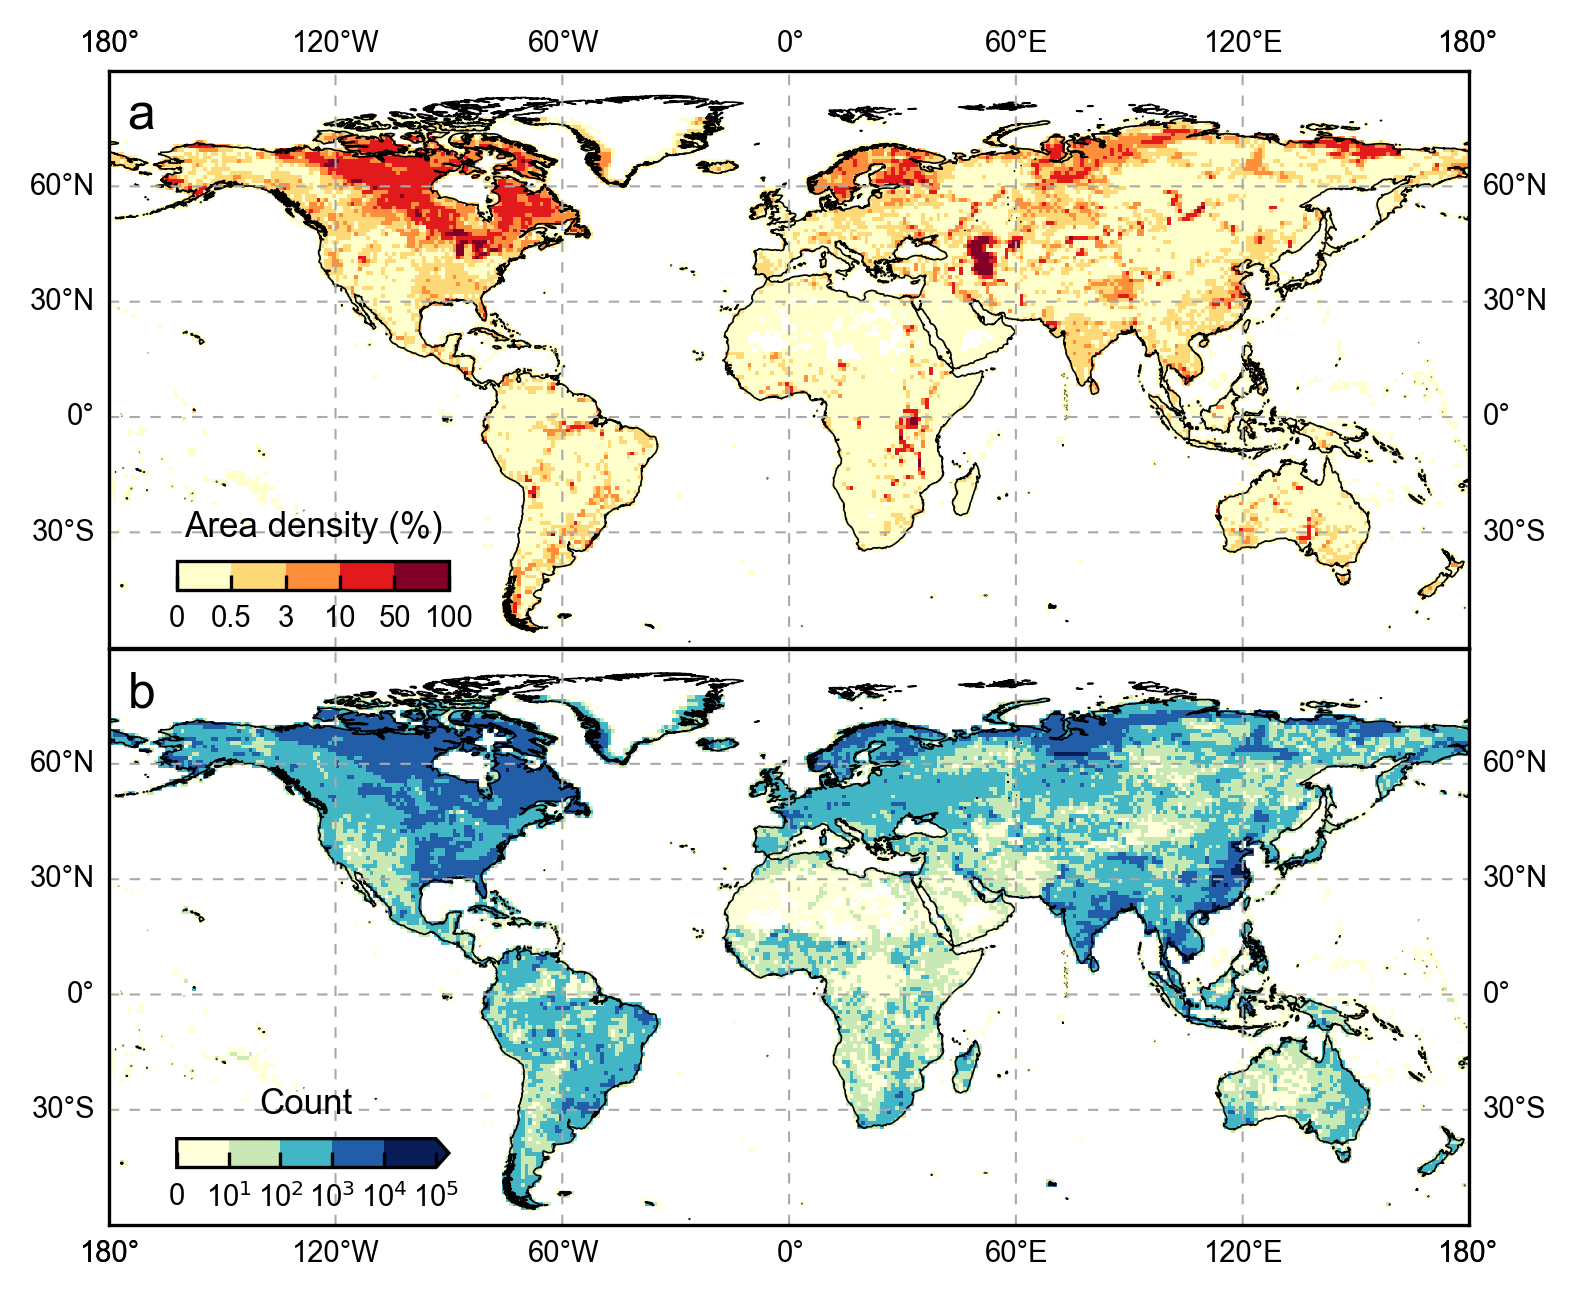

In [10]:
savepic=os.path.join(fig_path,'3-1 global lake distribution.png')
fig=plt.figure(figsize=(7.23,6.25),dpi=300)#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(4,2,width_ratios=[6,0.8],height_ratios=[2.5,2.5,0.45,0.8],wspace =0.18,hspace =0)

columns=['hu_ap','hu_c0']
grid_labels=[[0,0,1,0],[0,0,0,1]]
titles=['Area density (%)','Count']
colormap=['YlOrRd','YlGnBu']
# norms=[colors.LogNorm(vmin=1, vmax=30000),colors.PowerNorm(gamma=0.4,vmin=0.001, vmax=20)]
# ticks=[[10,100,1000,10000],[0,1,10,20]]

ticks=[[0,0.5,3,10,50,100],[0,10,100,1000,10000,100000]]
norms=[]
for i in [0,1]:
    cmap=plt.get_cmap(colormap[i])
    norms.append(colors.BoundaryNorm(ticks[i], cmap.N))
# 

for k in [0,1]:
    ax=plt.subplot(gs[k, 0])
#     RdYlBu_r = plt.cm.get_cmap(colormap[k], 256)#
#     newcolors = RdYlBu_r(np.linspace(0,1, 256))
#     white = np.array([255/256, 255/256, 255/256,1])
#     newcolors[:1, :] = white
#     terrain_map = ListedColormap(newcolors)
    terrain_map=plt.get_cmap(colormap[k])
    axins = ax.inset_axes((0.05, 0.1,0.2,0.05)) 
#     legend_kwds={'orientation': "horizontal",'extend':'max','ticks': ticks[k]}
    if k==0:
        legend_kwds={'orientation': "horizontal",'ticks': ticks[k]}
    else:
        legend_kwds={'orientation': "horizontal",'extend':'max','ticks': ticks[k]}
    add_background_fig(ax,axins,titles[k],latlon_1degree_SJ_last_data,terrain_map,columns[k],legend_kwds,norms[k])
    ax.text(-175,75,sub_fig_name[k],fontsize=12)
    if k==1:
        axins.xaxis.set_major_formatter(ticker.FuncFormatter(custom_ticks))
    else:
        def custom_ticks_2(x, pos):
            if x==0.5:
                return 0.5
            return int(x)
        axins.xaxis.set_major_formatter(ticker.FuncFormatter(custom_ticks_2))
    
# ## 面积、数量纬度分布图
# ### 面积
# ax2=plt.subplot(gs[1, 1],)
# plt.tick_params(bottom=True, top=True, left=True, right=True )
# s=4
# x=Lat_data['hu_a0'].values/(10.0**s)
# # plt.yticks(visible=False)
# draw_line(ax2,[0,15],range(0,16,5),[-60,90],range(-60,91,30),['k','k','#9e003a','#4A5F7E'],'#4A5F7E','x',x,latitude)
# ax2.text(15,-75,f'×10$^{s}$',ha='right',va='top', color=color_list[4])
# ax2.set_ylabel('Latitude')
# ax2.text(-8,80,sub_fig_name[2],fontsize=12)

# ax22 = ax2.twiny()
# s=5
# x=Lat_data['hu_c0'].values/(10.0**s)
# draw_line(ax22,[0,6],range(0,7,2),[-60,90],range(-60,91,30),['k','k','#9e003a','#4A5F7E'],'#9e003a','x',x,latitude)
# ax22.text(6,105,f'×10$^{s}$',ha='right',va='bottom', color='#9e003a')


# ax3=plt.subplot(gs[3,0])
# plt.tick_params(bottom=True, top=True, left=True, right=True )
# plt.tick_params(labelbottom=False,labeltop=False,labelleft=True, labelright=False)
# ax3.text(-200,2,sub_fig_name[3],fontsize=12)
# s=5
# y=Lon_data['hu_c0'].values/(10.0**s)
# draw_line(ax3,[-180,180],range(-180,181,60),[0,2],[0,1,2],['#9e003a','#4A5F7E','k','k'],'#9e003a','y',longitude,y)
# ax3.text(-180,2,f'×10$^{s}$',ha='left',va='bottom', color='#9e003a')
# ax3.set_xlabel('Longitude')
# ax3.xaxis.set_label_position("top")
# ax3.set_ylabel('Count', color='#9e003a')

# ax33 = ax3.twinx()
# s=4
# y=Lon_data['hu_a0'].values/(10.0**s)
# draw_line(ax33,[-180,180],range(-180,181,60),[0,10],range(0,11,5),['#9e003a','#4A5F7E','k','k'],'#4A5F7E','y',longitude,y)
# ax33.set_ylabel('Area ($\mathregular{km^2}$)', color='#4A5F7E')
# ax33.text(180,10,f'×10$^{s}$',ha='right',va='bottom', color='#4A5F7E')
# # plt.tight_layout()
plt.savefig(savepic,dpi=400,bbox_inches='tight')#,dpi=400
plt.show()

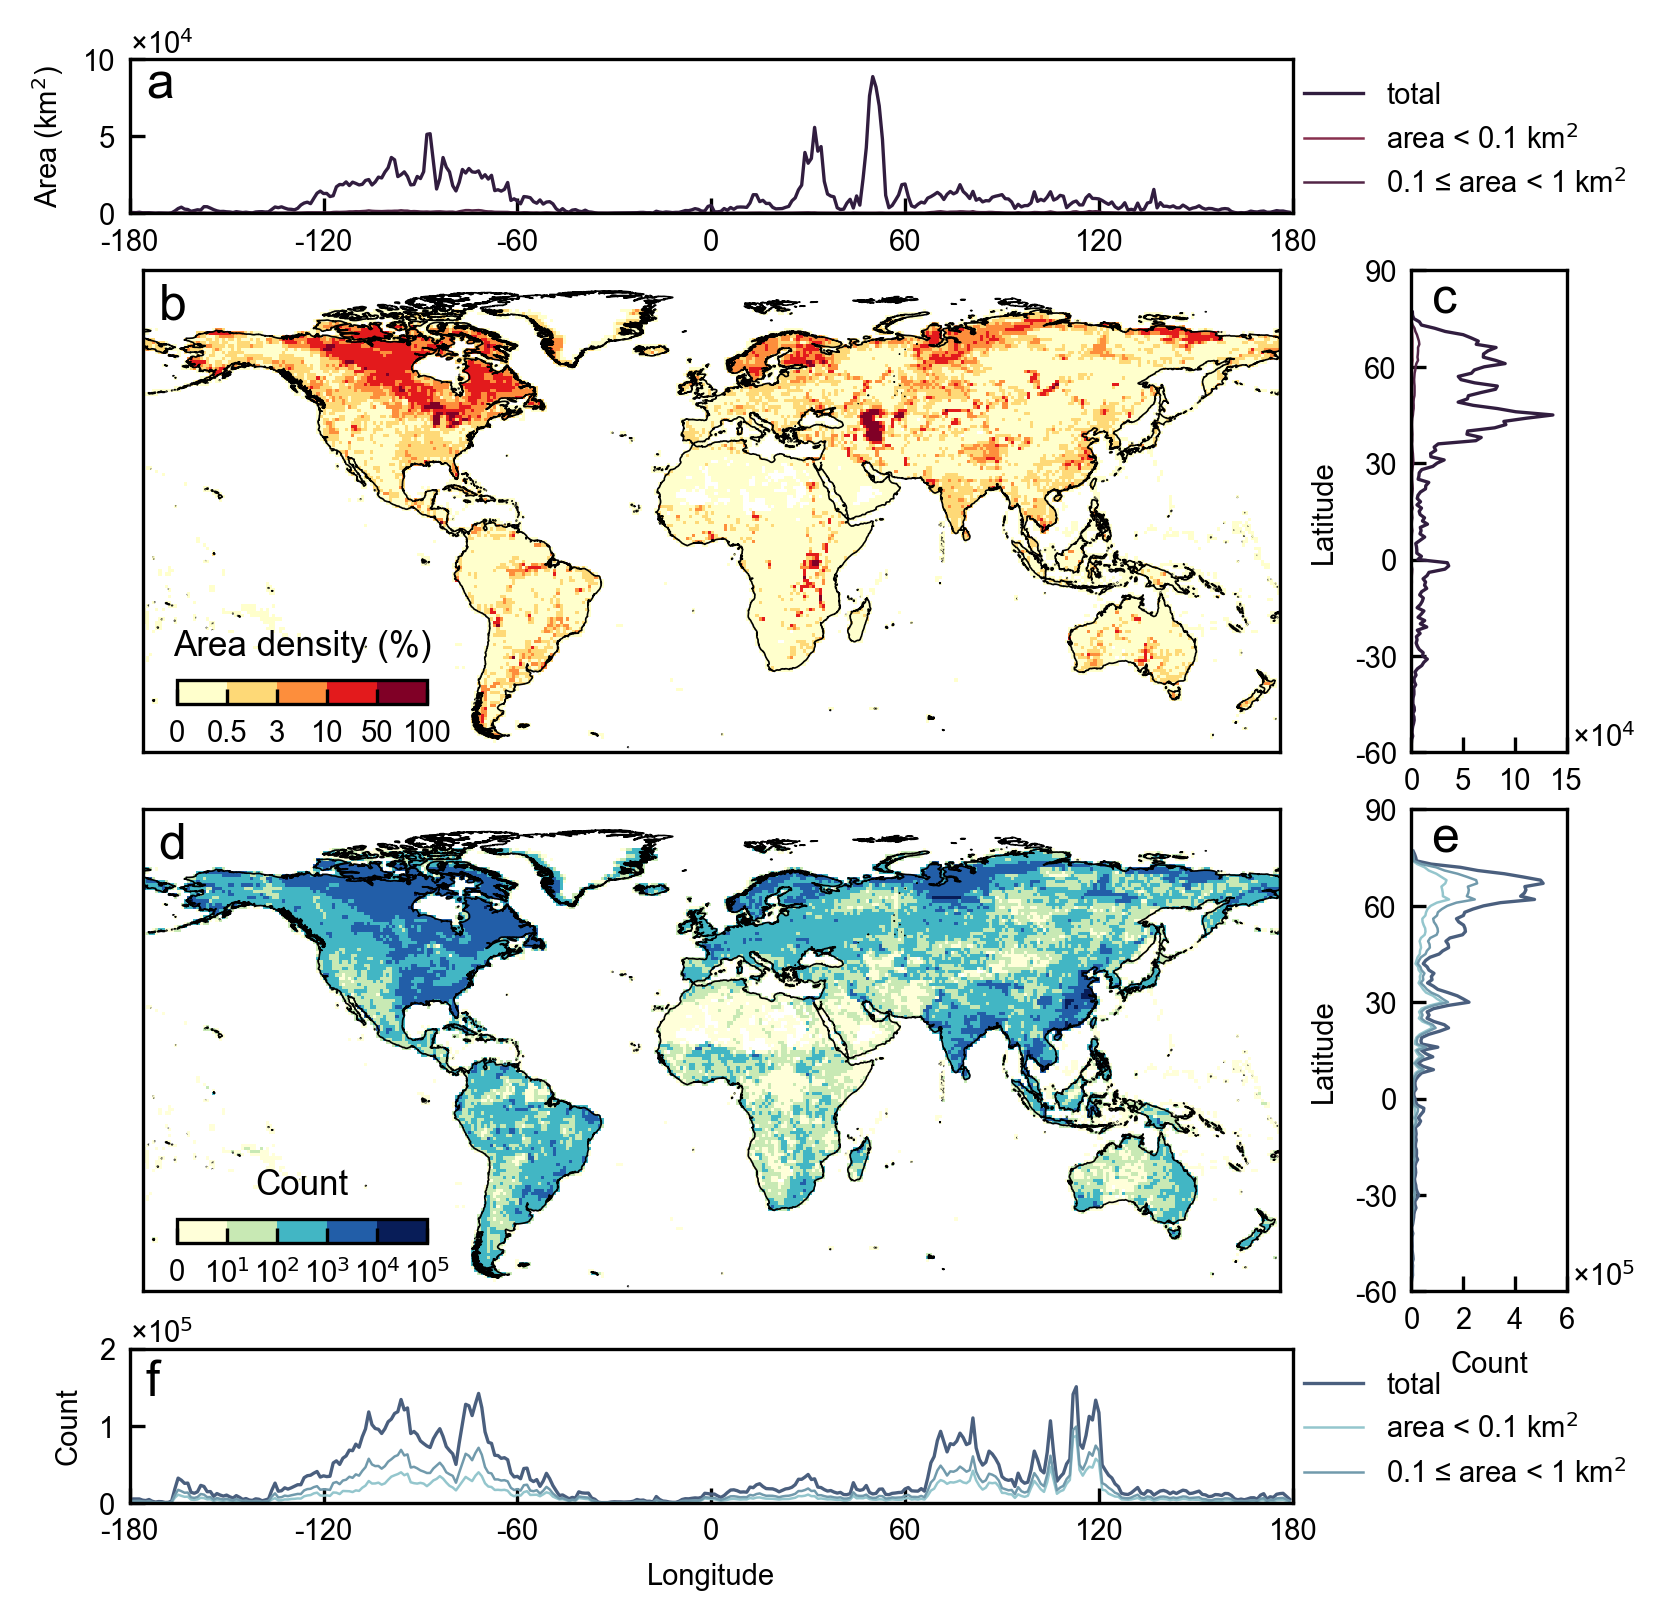

In [33]:
def draw_line_2(ax,xlim,xticks,ylim,yticks,line_color,linewidth,label,x,y):
    ax.set_xlim(xlim)
    ax.set_xticks(xticks)
    ax.set_ylim(ylim)
    ax.set_yticks(yticks)
    ax.plot(x, y, color=line_color, linestyle = "-",linewidth = linewidth,label=label)
    
savepic=os.path.join(fig_path,'3-1_global_lake_distribution_small_lake.png')
fig=plt.figure(figsize=(6.18,6.25),dpi=300)#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(4,2,width_ratios=[6,0.8],height_ratios=[0.8,2.5,2.5,0.8],wspace =0.18,hspace =0.18)

columns=['hu_ap','hu_c0']
grid_labels=[[0,0,1,0],[0,0,0,0]]
titles=['Area density (%)','Count']
colormap=['YlOrRd','YlGnBu']
ticks=[[0,0.5,3,10,50,100],[0,10,100,1000,10000,100000]]
norms=[]
for i in [0,1]:
    cmap=plt.get_cmap(colormap[i])
    norms.append(colors.BoundaryNorm(ticks[i], cmap.N))
    
## 面积、数量纬度分布图
### a 经度面积
ax1=plt.subplot(gs[0, 0],)
ax1.text(-175,7.5,sub_fig_name[0],fontsize=12)
s=4
y=Lon_data['hu_a0'].values/(10.0**s)
draw_line_2(ax1,[-180,180],range(-180,181,60),[0,10],[0,5,10],red_color_list[0],0.8,'total',longitude,y)
y=Lon_data['hu_a1'].values/(10.0**s)#GL_c0
draw_line_2(ax1,[-180,180],range(-180,181,60),[0,10],[0,5,10],red_color_list[2],0.6,'area < 0.1 km$^2$',longitude,y)
y=y+Lon_data['hu_a10'].values/(10.0**s)#GL_c0
draw_line_2(ax1,[-180,180],range(-180,181,60),[0,10],[0,5,10],red_color_list[1],0.6,'0.1 ≤ area < 1 km$^2$',longitude,y)
ax1.legend(loc=(1, 0.02),frameon=False)
ax1.text(-180,10,f'×10$^{s}$',ha='left',va='bottom', color='k')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Area (km$^2$)', color='k')

## b 格网面积
ax=plt.subplot(gs[1, 0])
ax.text(-175,75,sub_fig_name[1],fontsize=12)
terrain_map=plt.get_cmap(colormap[0])
axins = ax.inset_axes((0.03, 0.1,0.22,0.05)) 
legend_kwds={'orientation': "horizontal",'ticks': ticks[0]}
add_background_fig(ax,axins,titles[0],latlon_1degree_SJ_last_data,terrain_map,columns[0],legend_kwds,norms[0],False)
def custom_ticks_2(x, pos):
    if x==0.5:
        return 0.5
    return int(x)
axins.xaxis.set_major_formatter(ticker.FuncFormatter(custom_ticks_2))

## c 纬度面积
ax2=plt.subplot(gs[1, 1])
ax2.text(2,77,sub_fig_name[2],fontsize=12)
s=4
x=Lat_data['hu_a0'].values/(10.0**s)
draw_line_2(ax2,[0,15],[0,5,10,15],[-60,90],range(-60,91,30),red_color_list[0],0.8,'total',x,latitude)
x=Lat_data['hu_a1'].values/(10.0**s)#GL_c0
draw_line_2(ax2,[0,15],[0,5,10,15],[-60,90],range(-60,91,30),red_color_list[2],0.6,'area < 0.1 km$^2$',x,latitude)
x=x+Lat_data['hu_a10'].values/(10.0**s)#GL_c0
draw_line_2(ax2,[0,15],[0,5,10,15],[-60,90],range(-60,91,30),red_color_list[1],0.6,'0.1< area < 0.1 km$^2$',x,latitude)

ax2.set_ylabel('Latitude')
ax2.set_xlabel('Count')
ax2.text(15.5,-60,f'×10$^{s}$',ha='left',va='bottom', color='k')

## d 格网数量
ax3=plt.subplot(gs[2, 0])
ax3.text(-175,75,sub_fig_name[3],fontsize=12)
terrain_map=plt.get_cmap(colormap[1])
axins_3 = ax3.inset_axes((0.03, 0.1,0.22,0.05)) 
legend_kwds={'orientation': "horizontal",'ticks': ticks[1]}
add_background_fig(ax3,axins_3,titles[1],latlon_1degree_SJ_last_data,terrain_map,columns[1],legend_kwds,norms[1],False)
axins_3.xaxis.set_major_formatter(ticker.FuncFormatter(custom_ticks))

### e.纬度数量
ax4=plt.subplot(gs[2, 1],)
ax4.text(0.75,77,sub_fig_name[4],fontsize=12)
s=5
x=Lat_data['hu_c0'].values/(10.0**s)
draw_line_2(ax4,[0,6],range(0,7,2),[-60,90],range(-60,91,30),color_list[-1],0.8,'total',x,latitude)
x=Lat_data['hu_c1'].values/(10.0**s)
draw_line_2(ax4,[0,6],range(0,7,2),[-60,90],range(-60,91,30),color_list[-3],0.6,'area < 0.1 km$^2$',x,latitude)
x=x+Lat_data['hu_c10'].values/(10.0**s)
draw_line_2(ax4,[0,6],range(0,7,2),[-60,90],range(-60,91,30),color_list[-2],0.6,'0.1< area < 0.1 km$^2$',x,latitude)

ax4.set_ylabel('Latitude')
ax4.set_xlabel('Count')
ax4.text(6.2,-60,f'×10$^{s}$',ha='left',va='bottom', color='k')

### f.经度数量
ax5=plt.subplot(gs[3,0])
ax5.text(-175,1.4,sub_fig_name[5],fontsize=12)
s=5
y=Lon_data['hu_c0'].values/(10.0**s)
draw_line_2(ax5,[-180,180],range(-180,181,60),[0,2],[0,1,2],color_list[-1],0.8,'total',longitude,y)
y=Lon_data['hu_c1'].values/(10.0**s)#GL_c0
draw_line_2(ax5,[-180,180],range(-180,181,60),[0,2],[0,1,2],color_list[-3],0.6,'area < 0.1 km$^2$',longitude,y)
y=y+Lon_data['hu_c10'].values/(10.0**s)#GL_c0
draw_line_2(ax5,[-180,180],range(-180,181,60),[0,2],[0,1,2],color_list[-2],0.6,'0.1 ≤ area < 1 km$^2$',longitude,y)
ax5.legend(loc=(1, 0.02),frameon=False)
ax5.text(-180,2,f'×10$^{s}$',ha='left',va='bottom', color='k')
ax5.set_xlabel('Longitude')
ax5.set_ylabel('Count', color='k')
# # plt.tight_layout()
plt.savefig(savepic,dpi=400,bbox_inches='tight')#,dpi=400
plt.show()